<a href="https://colab.research.google.com/github/vkmuneer/fdp2021/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
#Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation

In [11]:
# load dataset
#col_names = ['Pregnancies', 'glucose', 'bp', 'skin','insulin', 'bmi', 'pedigree', 'age', 'label']
pima =pd.read_csv("/content/Pima.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable
X.shape

(768, 7)

In [14]:
X.describe()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,79.799479,31.992578,33.240885,120.894531,69.105469,0.471876
std,3.369578,115.244002,7.884160,11.760232,31.972618,19.355807,0.331329
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.078000
25%,1.000000,0.000000,27.300000,24.000000,99.000000,62.000000,0.243750
50%,3.000000,30.500000,32.000000,29.000000,117.000000,72.000000,0.372500
75%,6.000000,127.250000,36.600000,41.000000,140.250000,80.000000,0.626250
max,17.000000,846.000000,67.100000,81.000000,199.000000,122.000000,2.420000


In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6666666666666666


In [21]:
from six import StringIO

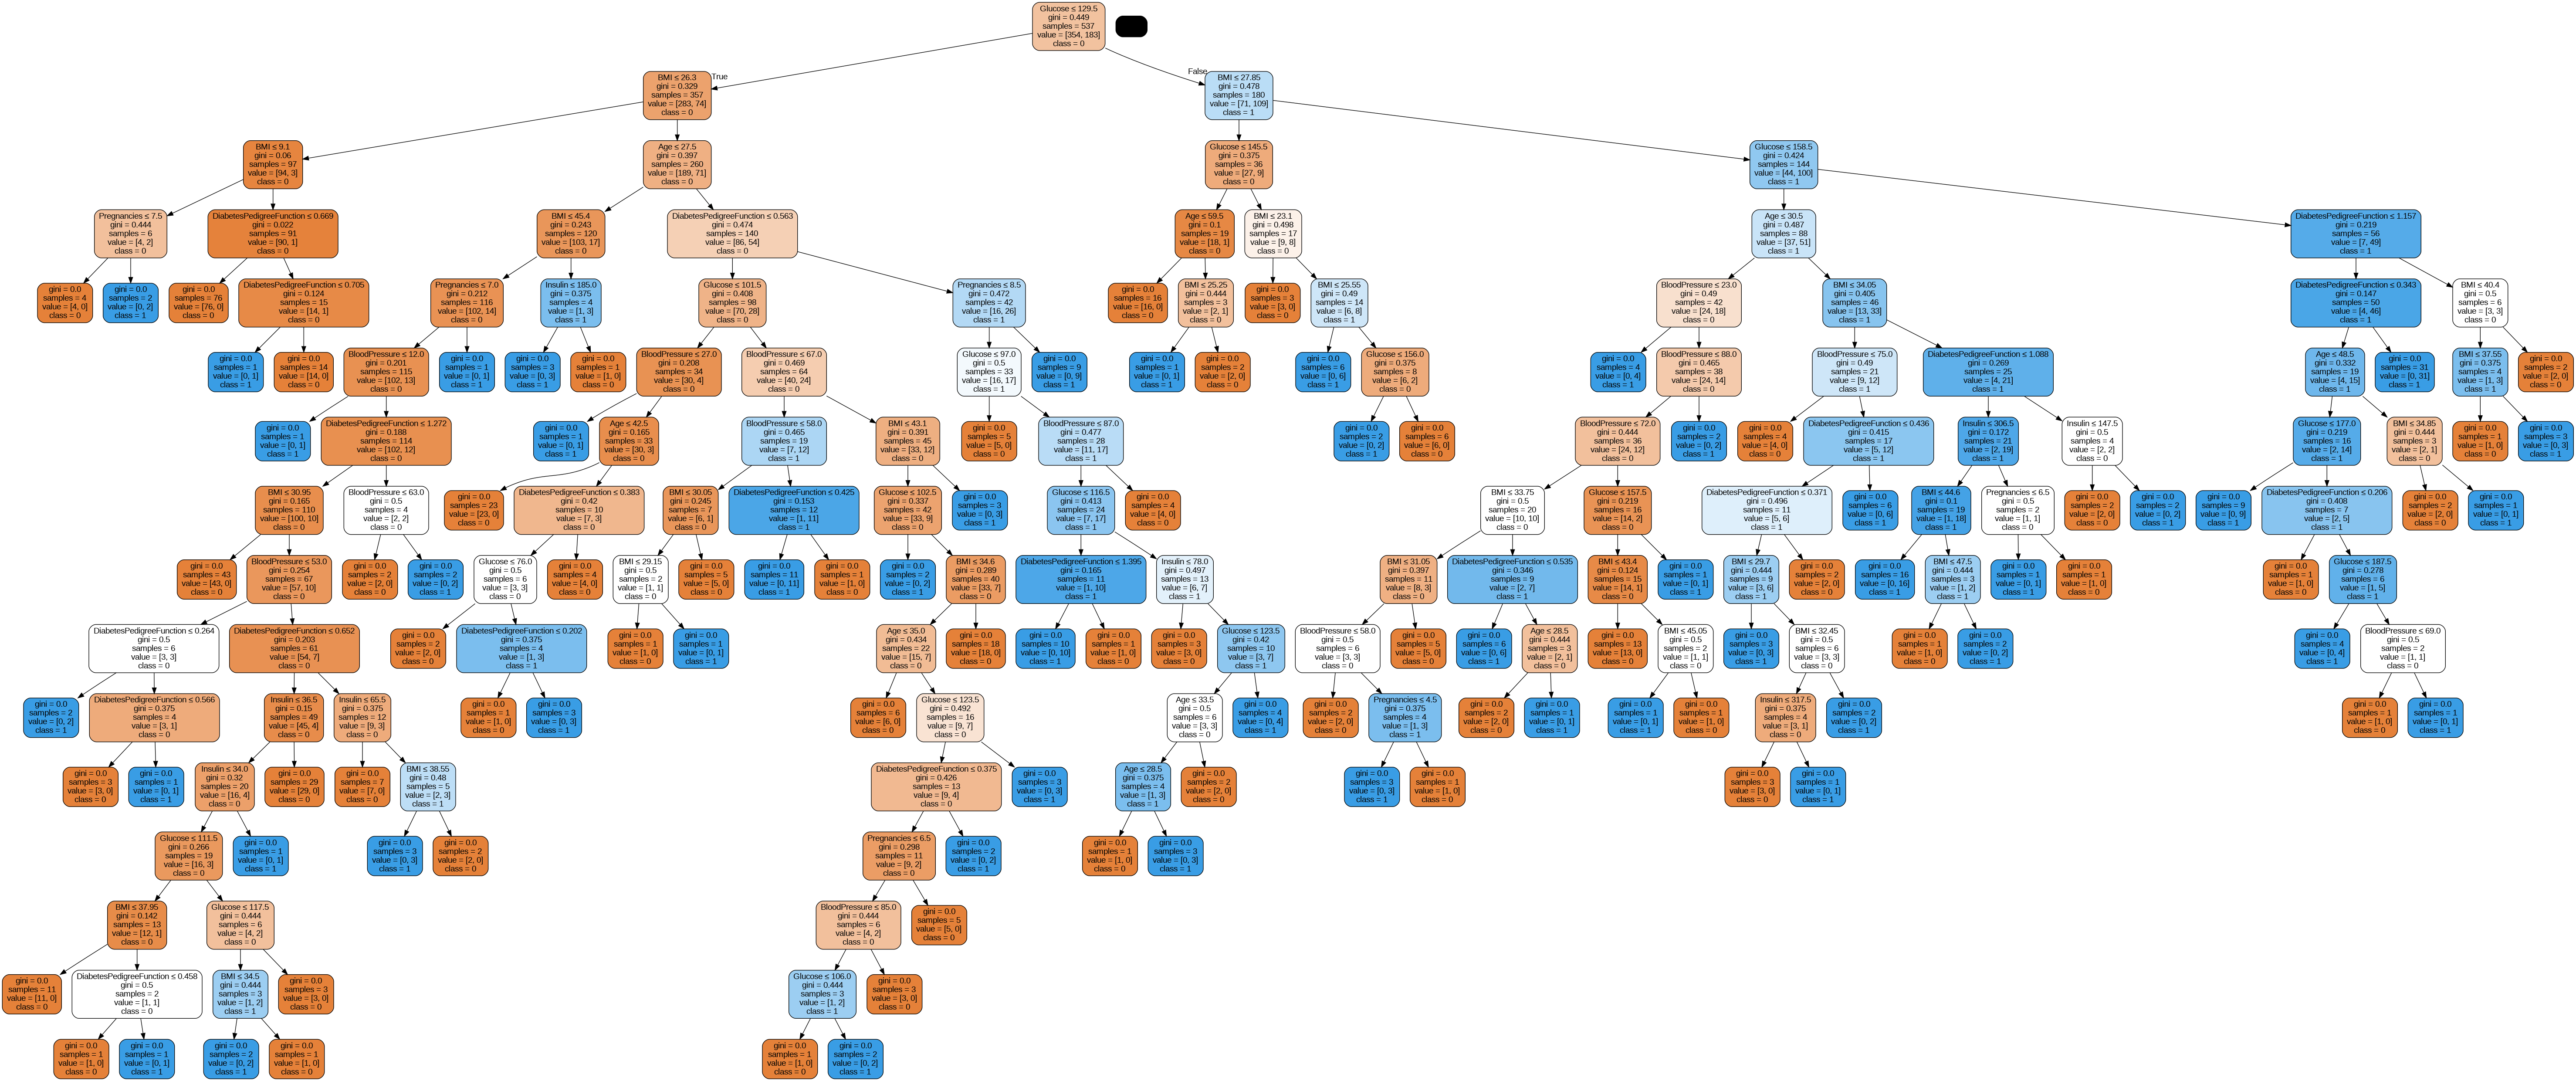

In [23]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


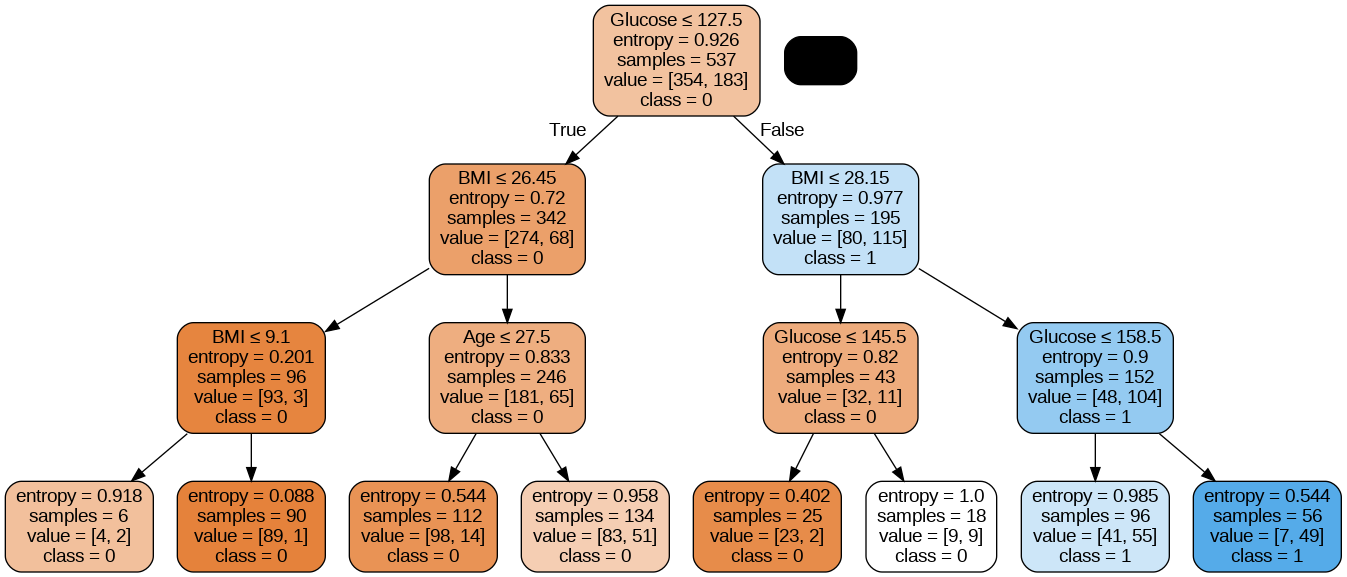

In [26]:
#from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7705627705627706
